In [1]:
# import libraries

# linear algebra
import numpy as np 
# data processing
import pandas as pd 
# data visualization
from matplotlib import pyplot as plt
from scipy.spatial import distance

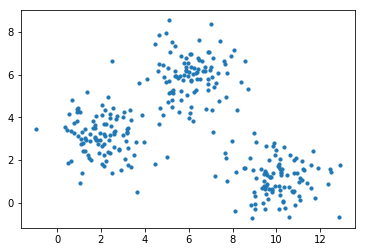

In [2]:
# load the data with pandas
dataset = pd.read_csv('dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

In [3]:


def calculate_initial_centers(dataset, k):
    """
    Inicializa os centróides iniciais de maneira arbitrária 
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    k -- Número de centróides desejados
    
    Retornos:
    centroids -- Lista com os centróides calculados - [k,n]
    """
    
    
    #### CODE HERE ####
    array=[]
    for i in range(0,k):
        array.append(np.random.uniform(dataset[0],dataset[299]))
        
    centroids = np.array(array)
    ### END OF CODE ###
    
    
    return centroids



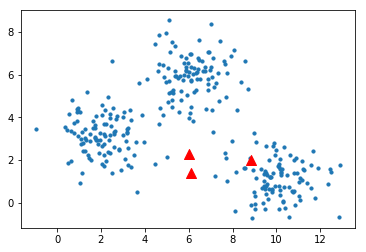

In [4]:
k = 3
centroids = calculate_initial_centers(dataset, k)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red',s=100)
plt.show()

In [5]:
def euclidean_distance(a, b):
    """
    Calcula a distância euclidiana entre os pontos a e b
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    b -- Um ponto no espaço - [1,n]
    
    Retornos:
    distance -- Distância euclidiana entre os pontos
    """
    
    #### CODE HERE ####
    
    distanceeu = distance.euclidean(a, b)
    
    ### END OF CODE ###
    
    return distanceeu

In [6]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if (euclidean_distance(a,b) == 3):
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!


In [7]:
def nearest_centroid(a, centroids):
    """
    Calcula o índice do centroid mais próximo ao ponto a
    
    Argumentos:
    a -- Um ponto no espaço - [1,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_index -- Índice do centróide mais próximo
    """
    
    #### CODE HERE ####
    distances = []
    for index, centroid in enumerate(centroids):
        distance = euclidean_distance(a,centroid)
        distances.append([distance])
    distances_f = np.array(distances)
    nearest_index = np.argmin(distances_f)
      
    ### END OF CODE ###
    """
    distance_zeros = np.zeros(centroid.shape[0])
    for index, centroid in enumerate(centroids):
        distance = euclidean_distance(a,centroid)
        distance_zeros[index] = distance
        
    nearest_index = np.argmin(distance_zeros)
    """
    return nearest_index

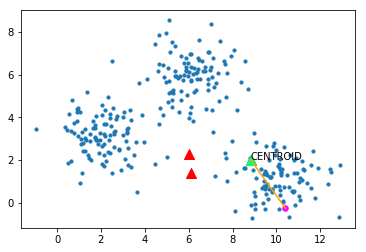

In [8]:
# Seleciona um ponto aleatório no dataset
index = np.random.randint(dataset.shape[0])
a = dataset[index,:]

# Usa a função para descobrir o centroid mais próximo
idx_nearest_centroid = nearest_centroid(a, centroids)


# Plota os dados ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], s=10)
# Plota o ponto aleatório escolhido em uma cor diferente
plt.scatter(a[0], a[1], c='magenta', s=30)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
# Plota o centroid mais próximo com uma cor diferente
plt.scatter(centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],
            marker='^', c='springgreen', s=100)

# Cria uma linha do ponto escolhido para o centroid selecionado
plt.plot([a[0], centroids[idx_nearest_centroid,0]], 
         [a[1], centroids[idx_nearest_centroid,1]],c='orange')
plt.annotate('CENTROID', (centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],))
plt.show()

In [9]:
def all_nearest_centroids(dataset, centroids):
    """
    Calcula o índice do centroid mais próximo para cada 
    ponto do dataset
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    
    Retornos:
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    """
    
    """
    #### CODE HERE ####
    nearest_indexes_array = []
    for x in range (0,299):
        idx_nearest_centroid = nearest_centroid(dataset[x], centroids)
        nearest_indexes_array.append([dataset[x][1],idx_nearest_centroid])
    
    nearest_indexes = np.array(nearest_indexes_array)
    ### END OF CODE ###
    
    """
    
    nearest_indexes = np.zeros(dataset.shape[0])
    
    for index, a in enumerate(dataset):
        nearest_indexes[index] = nearest_centroid(a,centroids)
    
    
    return nearest_indexes

In [10]:
nearest_indexes = all_nearest_centroids(dataset, centroids)
print (nearest_indexes)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


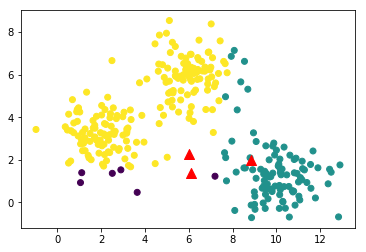

In [11]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
plt.show()

In [12]:
def inertia(dataset, centroids, nearest_indexes):
    """
    Soma das distâncias quadradas das amostras para o 
    centro do cluster mais próximo.
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    inertia -- Soma total do quadrado da distância entre 
    os dados de um cluster e seu centróide
    """
    
    #### CODE HERE ####
    inertia = 0
    for index, centroid in enumerate(centroids):
        dataframe = dataset[nearest_indexes == index,:]
        for a in dataframe:
            inertia += np.square(euclidean_distance(a, centroid))
      
    ### END OF CODE ###
    
    return inertia

In [13]:
tmp_data = np.array([[1,2,3],[3,6,5],[4,5,6]])
tmp_centroide = np.array([[2,3,4]])

tmp_nearest_indexes = all_nearest_centroids(tmp_data, tmp_centroide)
if inertia(tmp_data, tmp_centroide, tmp_nearest_indexes) == 26:
    print("Inertia calculada corretamente!")
else:
    print("Função de inertia incorreta!")


Inertia calculada corretamente!


In [14]:
# Use a função para verificar a inertia dos seus clusters
inertia(dataset, centroids, nearest_indexes)


3813.5748624910916

In [15]:
def update_centroids(dataset, centroids, nearest_indexes):
    """
    Atualiza os centroids
    
    Argumentos:
    dataset -- Conjunto de dados - [m,n]
    centroids -- Lista com os centróides - [k,n]
    nearest_indexes -- Índices do centróides mais próximos - [m,1]
    
    Retornos:
    centroids -- Lista com centróides atualizados - [k,n]
    """
    
    #### CODE HERE ####
    
    for index, centroid in enumerate(centroids):
        dataframe = dataset[nearest_indexes == index,:]
        if(dataframe.size != 0):
            centroids[index] = np.mean(dataframe, axis=0)
    
      
    ### END OF CODE ###
    
    return centroids

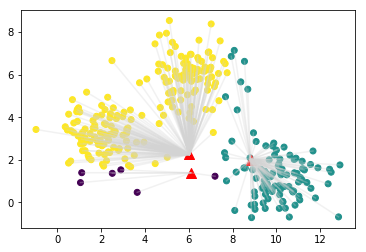

In [16]:
nearest_indexes = all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index,:]
    for data in dataframe:
        plt.plot([centroid[0], data[0]], [centroid[1], data[1]], 
                 c='lightgray', alpha=0.3)
plt.show()

In [17]:
centroids = update_centroids(dataset, centroids, nearest_indexes)

In [18]:
class KMeans():
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self,X):
        
        # Inicializa os centróides
        self.cluster_centers_ = calculate_initial_centers(X,self.n_clusters)
        
        # Computa o cluster de cada amostra
        self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
        
        # Calcula a inércia inicial
        old_inertia = inertia(X, self.cluster_centers_, self.labels_)
        
        for index in range(self.max_iter):
            
            #### CODE HERE ####
    
            self.cluster_centers_ = update_centroids(X, self.cluster_centers_, self.labels_)
            self.labels_ = all_nearest_centroids(X, self.cluster_centers_)
            self.inertia_ = inertia(X, self.cluster_centers_, self.labels_)
            if(old_inertia == self.inertia_):
                break
            else:
                old_inertia=self.inertia_
      
            ### END OF CODE ###
                    
        return self
    
    def predict(self, X):
        
        return all_nearest_indexes(X, self.cluster_centers_)

Inercia =  608.6035508327782


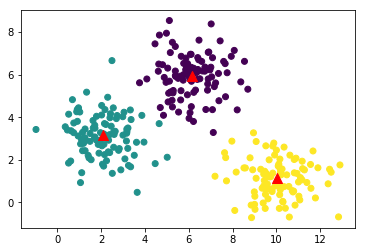

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)

print("Inercia = ", kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()